### Configuration

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parse as p

# Extremely important
sns.set(style="whitegrid", font_scale=1.35, rc={'figure.figsize':(11.7,5.27)}) #Change Font Size 

Please change this number for visual analysis

In [76]:
NUM_OF_NODE = 10
NUM_OF_INSTANCES = 2

### Parse files

In [77]:
TOTAL_NODES = NUM_OF_NODE * NUM_OF_INSTANCES

# Load Files
bwFileList = p.loadFiles(NUM_OF_NODE, NUM_OF_INSTANCES, "bandwidth")
delayFileList = p.loadFiles(NUM_OF_NODE, NUM_OF_INSTANCES, "delay")
congestionFileList = p.loadFiles(NUM_OF_NODE, NUM_OF_INSTANCES, "congestion")
blockFileList = p.loadFiles(NUM_OF_NODE, NUM_OF_INSTANCES, "blockArrival")
chainSplitFileList = p.loadFiles(NUM_OF_NODE, NUM_OF_INSTANCES, "chainSplit")

# Save into data structure
Bandwidths = [[] for _ in range(TOTAL_NODES)]
TX_ID, TX_Counter = dict(), dict()
BK_ID, BK_Counter = dict(), dict()
CG_ID, CG_Counter = dict(), dict()
CS_ID = list()

# Parse bandwidth.txt
for i in range(TOTAL_NODES):
    for entry in p.parseColumn(bwFileList[i], 0):
        Bandwidths[i].append(int(entry))

# Parse delay.txt
for i in range(TOTAL_NODES):
    for line in delayFileList[i]:
        l = line.split()
        tx_id, time = str(l[0]), l[1]
        if tx_id not in TX_ID.keys():
             TX_ID.update({tx_id: [float(time)]})
        else:
            TX_ID[tx_id].append(float(time))
            length = len(TX_ID[tx_id])
            TX_Counter.update({tx_id:length})            
            
# BlockArrival Time.txt
for i in range(TOTAL_NODES):
    for line in blockFileList[i]:
        l = line.split()
        tx_id, time = str(l[0]), l[1]
        if tx_id not in BK_ID.keys():
             BK_ID.update({tx_id: [float(time)]})
        else:
            BK_ID[tx_id].append(float(time))
            length = len(BK_ID[tx_id])
            BK_Counter.update({tx_id:length})                        
            
# Parse congestion.txt
for i in range(TOTAL_NODES):
    for line in congestionFileList[i]:
        l = line.split()
        tx_id, time = str(l[0]), l[1]
        if tx_id not in CG_ID.keys():
             CG_ID.update({tx_id: [float(time)]})
        else:
            CG_ID[tx_id].append(float(time))
            length = len(CG_ID[tx_id])
            CG_Counter.update({tx_id:length})            
        
# Parse chain split.txt
for i in range(TOTAL_NODES):
    for line in chainSplitFileList[i]:
        CS_ID.append(line.strip())
            

Delays = [[] for _ in range(len(TX_ID))]
for (i, (k, v)) in enumerate(TX_ID.items()):
    minimum =  float(np.min(v))
    for entry in v:
        Delays[i].append(entry - minimum)
        
Blocks = [[] for _ in range(len(BK_ID))]
for (i, (k, v)) in enumerate(BK_ID.items()):
    minimum =  float(np.min(v))
    for entry in v:
        Blocks[i].append(entry - minimum)
        
Reaches = [[] for _ in range(len(TX_ID))]
for (i, (k, v)) in enumerate(TX_Counter.items()):
    Reaches[i].append(int(v))
    
Congestions = [[] for _ in range(len(CG_ID))]
for (i, (k, v)) in enumerate(CG_ID.items()):
    for entry in v:
        Congestions[i].append(entry)
    
# print(TX_ID)
# print(TX_Counter)

Load Complete
Load Complete
Load Complete
Load Complete
Load Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete
Parsing Complete


### Bandwidth

In [78]:
b = pd.DataFrame(Bandwidths)
b = b.fillna(value="0")
b

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0,0,144,13,887,308,388,1400,698,0,...,0,0,0,0,0,0,0,0,0,0
1,0,65,39,1015,794,96,1400,700,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,92,39,39,429,647,122,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,142,39,956,300,72,0,0,0,0,...,0,0,0,0,71,0,0,0,0,0
4,0,0,92,39,0,1140,39,2819,702,0,...,0,0,0,0,0,0,0,0,0,0
5,0,131,13,570,303,72,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,132,0,663,149,760,2098,1049,0,...,0,0,0,0,0,0,0,0,0,0
7,0,157,26,718,918,252,1839,1049,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,118,84,562,472,401,1402,1400,0,...,0,0,0,0,0,0,0,0,0,0
9,0,95,52,851,609,913,1070,71,0,0,...,0,0,0,0,0,0,0,0,0,0


### Delays

In [79]:
d = pd.DataFrame(Delays)
d.T

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,1.701934,0.000000,0.000000,0.014359,1.471259,0.000000,0.0,0.699965,15.786390,0.052335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.003580,16.869431,0.087737,82.367836,29.895610,0.024599,NaN,0.701216,11.170458,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.969407,144.865518,NaN,125.967725,128.234869,NaN,NaN,0.191310,142.972259,93.683854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,12.253543,NaN,17.100587,83.824671,NaN,NaN,0.000000,0.225197,137.283726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.734824,47.136567,NaN,41.824283,127.424529,NaN,NaN,NaN,0.153160,28.416601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.878427,144.055162,NaN,0.000000,155.172363,NaN,NaN,NaN,2.044701,17.870347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.166147,NaN,0.110093,43.281269,NaN,NaN,NaN,0.164754,0.086927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,59.911971,NaN,0.185384,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,3.127723,NaN,NaN,1.456863,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.044585,NaN,NaN,1.566998,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reachability

In [80]:
r = pd.DataFrame(Reaches)
r.T

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,12.0,12.0,4.0,5.0,7.0,7.0,6.0,3.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Congestion

In [81]:
cg = pd.DataFrame(Congestions)
cg.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,39.965051,95.842195,13.972790,114.018704,24.246909,54.974732,115.448859,21.837983,39.383109,97.047939,113.870856,47.056019,47.417902,67.483786,136.585742,18.207558,31.477012,161.512522
1,26.985137,NaN,121.025022,NaN,NaN,23.946543,125.835817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.077732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,155.100984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Blocks

In [82]:
bl = pd.DataFrame(Blocks)
bl.T

,0,1,2,3,4
0,0.0,0.000000,0.0,0.0,0.0
1,NaN,38.901821,NaN,NaN,NaN
2,NaN,146.777626,NaN,NaN,NaN
3,NaN,31.339453,NaN,NaN,NaN
4,NaN,9.742842,NaN,NaN,NaN
5,NaN,17.629271,NaN,NaN,NaN


### Chainsplit

In [83]:
ch = pd.DataFrame(CS_ID)
ch.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Congestion Delay

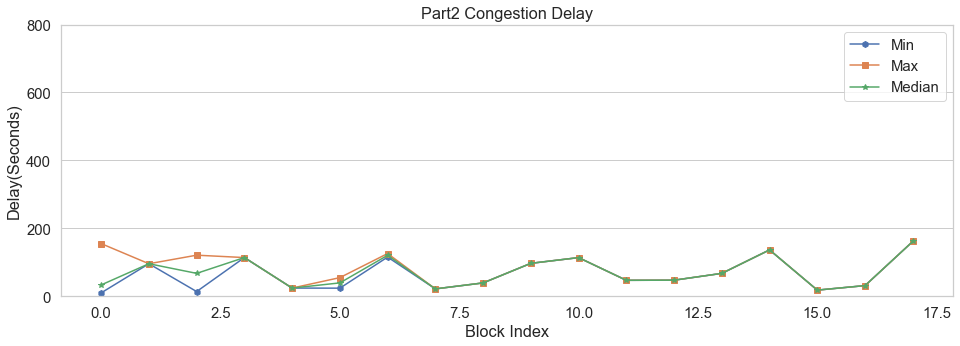

In [84]:
# Setting
txNum = len(CG_ID)
txRange = range(0, txNum) # Number of transactions
c_minVal, c_maxVal, c_median = cg.T.min(), cg.T.max(), cg.T.median()

# Delay
fig, ax5 = plt.subplots(figsize=(16, 5))
# plt.subplots(figsize=(16, 5)) 
# plt.subplots_adjust(hspace=10)

plt.plot(txRange, c_minVal, marker='h')
plt.plot(txRange, c_maxVal, marker='s')
plt.plot(txRange, c_median, marker='*')
ax5.legend(['Min', 'Max', 'Median'])

# for i in range(0, txNum):
#     plt.plot(txRange, d[i], marker='h')
ax5.set(xlabel='Block Index', ylabel='Delay(Seconds)', title='Part2 Congestion Delay', label="max")
plt.yticks(np.arange(0, 1000, step=200))
plt.grid(b=None, which='major', axis='x')

# Save as file
plt.savefig('img/Part2_CongestionDelay_Plot.png')

### ChainSplit

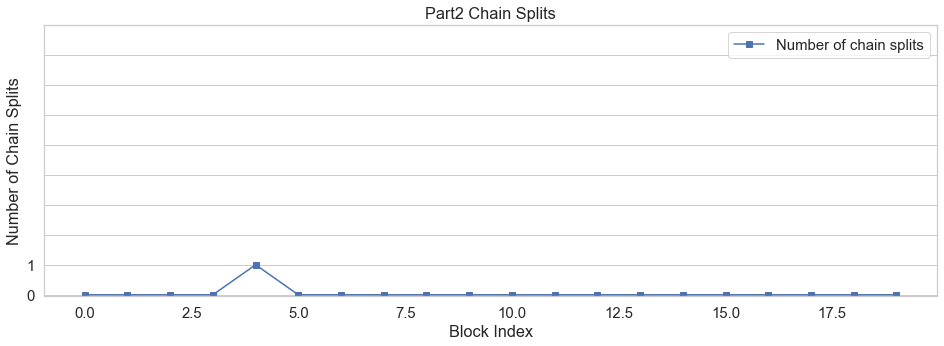

In [85]:
# Setting
txNum = len(CS_ID)
txRange = range(0, txNum) # Number of transactions

# Number
fig, ax6 = plt.subplots(figsize=(16, 5))

plt.plot(txRange, CS_ID, marker='s')
ax6.legend(['Number of chain splits'])

# for i in range(0, txNum):
#     plt.plot(txRange, d[i], marker='h')
ax6.set(xlabel='Block Index', ylabel='Number of Chain Splits', title='Part2 Chain Splits', label="max")
plt.yticks(np.arange(0, 10, step=1))
plt.grid(b=None, which='major', axis='x')

# Save as file
plt.savefig('img/Part2_ChainSplits_Plot.png')

### BlockArrival Time

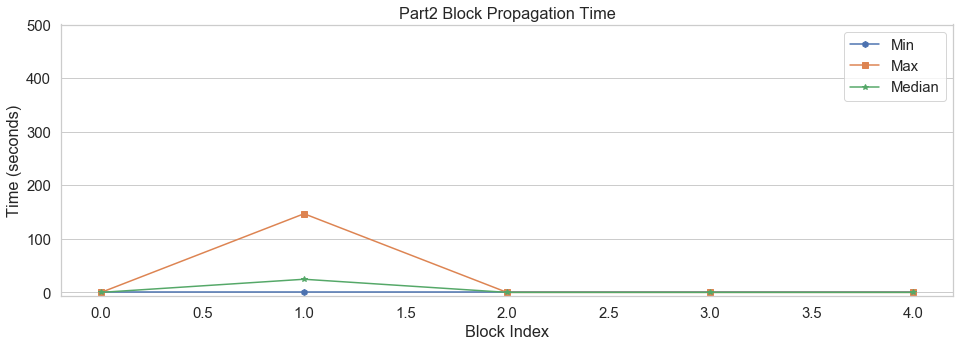

In [95]:
# Setting
txNum = len(BK_ID)
txRange = range(0, txNum) # Number of transactions
bl_minVal, bl_maxVal, bl_median = bl.T.min(), bl.T.max(), bl.T.median()

# Number
fig, ax7 = plt.subplots(figsize=(16, 5))


plt.plot(txRange, bl_minVal, marker='h')
plt.plot(txRange, bl_maxVal, marker='s')
plt.plot(txRange, bl_median, marker='*')
ax7.legend(['Min', 'Max', 'Median'])

ax7.set(xlabel='Block Index', ylabel='Time (seconds)', title='Part2 Block Propagation Time', label="max")
plt.yticks(np.arange(0, 600, step=100))
plt.grid(b=None, which='major', axis='x')

# Save as file
plt.savefig('img/Part2_BlockArrival_Plot.png')